In [1]:
using Oscar

  ___   ____   ____    _    ____
 / _ \ / ___| / ___|  / \  |  _ \   |  Combining ANTIC, GAP, Polymake, Singular
| | | |\___ \| |     / _ \ | |_) |  |  Type "?Oscar" for more information
| |_| | ___) | |___ / ___ \|  _ <   |  Manual: https://docs.oscar-system.org
 \___/ |____/ \____/_/   \_\_| \_\  |  Version 1.2.2


   Resolving package versions...
   Installed libfdk_aac_jll ─────────────── v2.0.3+0
   Installed JpegTurbo_jll ──────────────── v3.0.4+0
   Installed Libmount_jll ───────────────── v2.40.2+0
   Installed GR_jll ─────────────────────── v0.73.9+0
   Installed LERC_jll ───────────────────── v4.0.0+0
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed LoggingExtras ──────────────── v1.1.0
   Installed Unitful ────────────────────── v1.21.1
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+1
   Installed Measures ───────────────────── v0.3.2
   Installed Opus_jll ───────────────────── v1.3.3+0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed ConcurrentUtilities ────────── v2.4.3
   Installed Contour ────────────────────── v0.6.3
   Installed Grisu ──────────────────────── v1.0.2
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed PlotUtils ─

   Installed LAME_jll ───────────────────── v3.100.2+0
   Installed Qt6Wayland_jll ─────────────── v6.7.1+1
   Installed Qt6Base_jll ────────────────── v6.7.1+1
   Installed URIs ───────────────────────── v1.5.1
   Installed Glib_jll ───────────────────── v2.82.2+1
   Installed Xorg_libX11_jll ────────────── v1.8.6+1
   Installed Libglvnd_jll ───────────────── v1.7.0+0
   Installed Xorg_libXdmcp_jll ──────────── v1.1.4+1
   Installed LaTeXStrings ───────────────── v1.4.0
   Installed libvorbis_jll ──────────────── v1.3.7+2
   Installed Requires ───────────────────── v1.3.0
   Installed Unzip ──────────────────────── v0.2.0
   Installed UnitfulLatexify ────────────── v1.6.4
   Installed SortingAlgorithms ──────────── v1.2.1
    Updating `~/.julia/environments/v1.11/Project.toml`
  [91a5bcdd] + Plots v1.40.9
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [66dad0bd] + AliasTables v1.1.3
  [d1d4a3ce] + BitFlags v0.1.9
  [944b1d66] + CodecZlib v0.7.6
  [35d6a980] + ColorSchemes 

Precompiling project...
    916.9 ms  ✓ Pipe
    930.8 ms  ✓ Contour
    933.1 ms  ✓ TensorCore
   1130.7 ms  ✓ LaTeXStrings
   1038.6 ms  ✓ StatsAPI
   1210.4 ms  ✓ Measures
   1385.3 ms  ✓ OrderedCollections
    839.6 ms  ✓ Reexport
   1821.7 ms  ✓ Grisu
    981.6 ms  ✓ StableRNGs
   1106.4 ms  ✓ Requires
   1185.4 ms  ✓ Unzip
   1039.1 ms  ✓ SimpleBufferStream
    939.0 ms  ✓ PtrArrays
   2373.1 ms  ✓ Format
   1476.5 ms  ✓ URIs
   1158.2 ms  ✓ TranscodingStreams
    919.5 ms  ✓ DataAPI
   1061.8 ms  ✓ DelimitedFiles
   1218.1 ms  ✓ NaNMath
   1009.8 ms  ✓ BitFlags
   1401.4 ms  ✓ ConcurrentUtilities
   1176.3 ms  ✓ LoggingExtras
    929.7 ms  ✓ RelocatableFolders
   1072.2 ms  ✓ ExceptionUnwrapping
   1180.5 ms  ✓ EpollShim_jll
   1276.0 ms  ✓ Libmount_jll
   1154.9 ms  ✓ Xorg_libICE_jll
   1162.2 ms  ✓ Xorg_libXau_jll
   1255.9 ms  ✓ libpng_jll
   1431.4 ms  ✓ libfdk_aac_jll
   1520.6 ms  ✓ Pixman_jll
   1541.9 ms  ✓ LAME_jll
   3010.4 ms  ✓ UnicodeFun
   1119.2 ms  ✓ fzf_jll
   1

In [10]:
using Plots

In [ ]:
function partgalois(k,nmax,pind)
    PartFullGG=[]
    for n in 2:nmax
        M=matrix_space(QQ,n,n)
        count=0
        A=M()
        p=prob(pind,n)
        for l=1:k
            for i=1:n
                for j=1:n
                    if (rand()<p)
                        A[i,j]=1
                    else
                        A[i,j]=0
                    end
                end
            end
            Char=charpoly(A)
            if(is_irreducible(Char))
                G,C=galois_group(Char)
                if(order(G)==factorial(big(n)))
                    count=count+1;
                end
            end
        end
        a=count/k
        push!(PartFullGG,a)
    end
    return PartFullGG
end



function prob(i,n)
    if i==1
        return 1/2
    end
    if i==2
        return 2*log(n)/n
    end
    if i==3
        return 4/n
    end
end


y1=partgalois(1000,25,1)

y2=partgalois(1000,25,2)

y3=partgalois(1000,25,3)

x=2:25


Plot=plot(x,y1,
    seriestype=:scatter;
    xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:black
)

#p=4/n, k=1000

plot!(x,y2,
    seriestype=:scatter;
    xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:blue
)

#p=2*ln(n)/n, k=1000
plot!(x,y3,
seriestype=:scatter;
xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:red
)
display(Plot)
savefig("PlotGG.pdf")

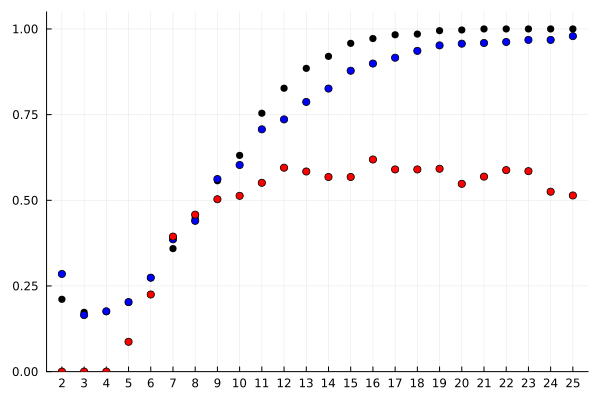

"/export/home/taemmric/PlotIrred.pdf"

In [17]:
function partirred(k,nmax,pind)
    PartFullGG=[]
    for n in 2:nmax
        M=matrix_space(QQ,n,n)
        count=0
        A=M()
        p=prob(pind,n)
        for l=1:k
            for i=1:n
                for j=i:n
                    if (rand()<p)
                        A[i,j]=1
                        A[j,i]=1
                    else
                        A[i,j]=0
                        A[j,i]=0
                    end
                end
            end
            Char=charpoly(A)
            if(is_irreducible(Char))
                count=count+1
            end
        end
        a=count/k
        push!(PartFullGG,a)
    end
    return PartFullGG
end



function prob(i,n)
    if i==1
        return 1/2
    end
    if i==2
        return 2*log(n)/n
    end
    if i==3
        return 4/n
    end
end


y1=partirred(1000,25,1)

y2=partirred(1000,25,2)

y3=partirred(1000,25,3)

x=2:25


Plot=plot(x,y1,
    seriestype=:scatter;
    xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:black
)

#p=4/n, k=1000

plot!(x,y2,
    seriestype=:scatter;
    xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:blue
)

#p=2*ln(n)/n, k=1000
plot!(x,y3,
seriestype=:scatter;
xticks=(1:25),
    ylim=(0,1.05),
    legend=false,
    color=:red
)

display(Plot)
savefig("PlotIrred.pdf")